### set folder_name and `num_trials`
- `num_trials` and `threshold_shift` based on preprocessing alignment (see PreprocessLeverData notebooks) and can be found for each day's session in the Google sheets analysis log

In [103]:
name = 'ANM1'
session = '20240203_d5'
num_trials = 64
threshold_shift = 0.0

In [104]:
hit_trials_to_exclude = [60]

### imports:

In [105]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

from common.set_matplotlib_settings import set_matplotlib_settings
from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.select_trials import select_hit_trials
from common.select_trials import save_custom_hit_trials
from common.select_trials import select_custom_hit_trials
from hit_movements.get_movement_thresholds import get_movement_thresholds
from hit_movements.extract_leverpresses import extract_leverpresses
from common.extract_movement_intervals import extract_movement_intervals

### Setup folders and matfiles

In [106]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscriminationData/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, arduino, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

PreprocessLeverData_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
output_folder = "../Data_Copy/AnalysisData/"+name+"/HitMovements_"+name+"_"+session+"/"
!mkdir {output_folder}

respMTX shape: (70, 7)
MTXTrialType shape: (1000, 5)
number of trials: 70
mkdir: ../Data_Copy/AnalysisData/ANM1/HitMovements_ANM1_20240203_d5/: File exists


### find all movements from trials that meet all thresholds

select all hit trials for consideration

In [107]:
hit_trials = select_hit_trials(respMTX, num_trials)
save_custom_hit_trials(output_folder, hit_trials)

45  hit trials in this session.


delete trials as necessary and resave

In [108]:
for trial_index in hit_trials_to_exclude:
    hit_trials.remove(trial_index)
save_custom_hit_trials(output_folder, hit_trials)
hit_trials = select_custom_hit_trials(output_folder)

44  hit trials in this session.


_in LeverData voltage_

In [109]:
movement_baseline, movement_threshold, no_movement_threshold = get_movement_thresholds(params, respMTX, threshold_shift)

movement_baseline for all trials should be the same:  1.6850439882697943
mvt threshold:  0.25 + movement_baseline =  1.9350439882697943
nomvt threshold:  0.15 + movement_baseline =  1.8350439882697942


`leverpress_informations`: each selected trial has a row

columns are `trial_index` |  `leverpress_left_index` sample when leverpress starts | `leverpress_right_index` sample when leverpress ends

In [110]:
hit_leverpress_informations = extract_leverpresses(hit_trials, PreprocessLeverData_folder, \
                                              movement_baseline, movement_threshold, no_movement_threshold,\
                                                output_folder)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Checking trial  0 ...
finding right threshold...
met
finding left threshold...
met
Checking trial  4 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.7067961635113256
48809
new leverpress index value:  1.9351979468473823
finding right threshold...
met
finding left threshold...
met
Checking trial  6 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.8046281481190043
53516
new leverpress index value:  1.9366255226188436
finding right threshold...
met
finding left threshold...
met
Checking trial  7 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.7119905995196434
44779
new leverpress index value:  1.9353965269304472
finding right threshold...
met
finding left threshold...
me

met
finding left threshold...
met
Checking trial  21 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.696474366015949
27468
new leverpress index value:  1.9358814023335316
finding right threshold...
met
finding left threshold...
met
Checking trial  22 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.7825437421339285
36958
new leverpress index value:  1.935479607264532
finding right threshold...
met
finding left threshold...
met
Checking trial  23 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.7319335631533028
48462
new leverpress index value:  1.9362299007991641
finding right threshold...
met
finding left threshold...
met
Checking trial  24 ...
leverpress detection was at below first threshold, try moving leverpress index up...
1.705503124792989
3601
end of trial, did not have leverpress.
new leverpress index value:  1.9350148211022327
finding right threshold.

### Save movements from `movements` into separate "movement_trial#" .npy files
`movement`: first row is times, second row is leverdata

Movements will have MVT0 subtracted off and be temporally aligned to be comparable

In [111]:
hit_movements = extract_movement_intervals(hit_leverpress_informations, \
                                           'processed', PreprocessLeverData_folder, PreprocessLeverData_folder, output_folder, \
                                            movement_baseline)

check by plotting movements that are MVT0 subtracted and temporally aligned:

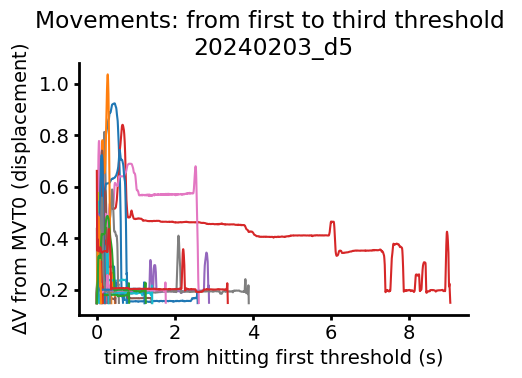

In [112]:
set_matplotlib_settings()

for hit_movement in hit_movements:
    # also check by plotting all of the movements
    plt.plot(hit_movement[0, :], hit_movement[1, :])
plt.title("Movements: from first to third threshold \n"+session)
plt.xlabel("time from hitting first threshold (s)")
plt.ylabel("$\Delta$V from MVT0 (displacement)")

plt.savefig(output_folder+"plot_movements.png")
plt.show()